<a href="https://colab.research.google.com/github/JuJu2181/earthquake-damage-predictor/blob/master/Earthquake_Damage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting Google Drive

In [ ]:

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
ls

csv_building_damage_assessment.csv/     csv_building_structure.csv/
csv_building_damage_assessment.csv.zip  csv_building_structure.csv.zip


## Dataset Collection

In [ ]:
!unzip "csv_building_structure.csv.zip" -d "csv_building_structure.csv"

unzip:  cannot find or open csv_building_structure.csv.zip, csv_building_structure.csv.zip.zip or csv_building_structure.csv.zip.ZIP.


## Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing Data

In [ ]:
df = pd.read_csv("csv_building_structure.csv/csv_building_structure.csv")
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


## Configuring pandas

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

label: column 53

In [ ]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

## EDA

In [ ]:
df.columns


Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

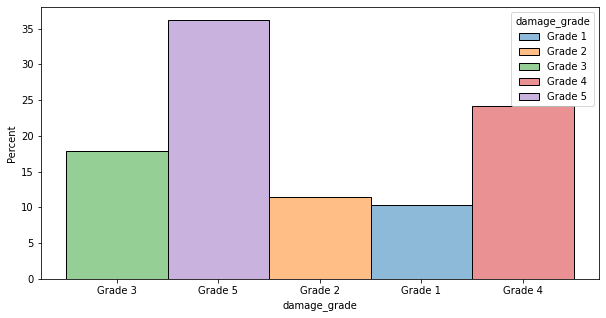

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x="damage_grade", kde=True, hue="damage_grade", stat="percent", hue_order=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"],ax=ax);

In [ ]:
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,2.087783,1.252058,24.326405,406.672576,16.049372,9.868817,0.042401,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026
std,5.801855e+10,5.807555,581.172767,58117.348412,0.655101,1.063275,65.043704,226.779371,5.493878,8.574169,0.201502,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df["district_id"].value_counts()

24    98019
31    90994
30    89122
23    88741
36    78074
28    77148
20    68750
22    60639
21    58623
12    39352
29    12644
Name: district_id, dtype: int64

## Data Cleaning

In [ ]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

Cleaning features for nan values

In [ ]:
# function to replace nan values by mode 
def replaceNanByMode(df,column):
  df[column].fillna(df[column].mode()[0],inplace=True)

In [ ]:
# replace position
replaceNanByMode(df,"position")
# replace plan_configuration
replaceNanByMode(df,"plan_configuration")
# replace technical_solution_proposed
replaceNanByMode(df,"technical_solution_proposed")
# replace damage grade 
# replaceNanByMode(df,"damage_grade")

In [ ]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   0
plan_configuration                         0
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

## Data Preprocessing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762094 non-null  int64 
 1   district_id                             762094 non-null  int64 
 2   vdcmun_id                               762094 non-null  int64 
 3   ward_id                                 762094 non-null  int64 
 4   count_floors_pre_eq                     762094 non-null  int64 
 5   count_floors_post_eq                    762094 non-null  int64 
 6   age_building                            762094 non-null  int64 
 7   plinth_area_sq_ft                       762094 non-null  int64 
 8   height_ft_pre_eq                        762094 non-null  int64 
 9   height_ft_post_eq                       762094 non-null  int64 
 10  land_surface_condition                  762094 non-null 

In [ ]:
df["land_surface_condition"].value_counts()

Flat              631663
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [ ]:
df["foundation_type"].value_counts(0)

Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [ ]:
df["roof_type"].value_counts()

Bamboo/Timber-Light roof    503736
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: roof_type, dtype: int64

In [ ]:
df["ground_floor_type"].value_counts()

Mud            618205
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dtype: int64

In [ ]:
df["other_floor_type"].value_counts()

TImber/Bamboo-Mud    486907
Timber-Planck        123624
Not applicable       118821
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

In [ ]:
df["position"].value_counts()

Not attached       604443
Attached-1 side    129431
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

In [ ]:
df["plan_configuration"].value_counts()

Rectangular                        731246
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [ ]:
df["condition_post_eq"].value_counts()

Damaged-Not used                           207968
Damaged-Rubble unclear                     125650
Damaged-Used in risk                       123843
Damaged-Repaired and used                  107791
Damaged-Rubble clear                       102191
Not damaged                                 61139
Damaged-Rubble Clear-New building built     33130
Covered by landslide                          382
Name: condition_post_eq, dtype: int64

In [ ]:
df["damage_grade"].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

In [ ]:
df["technical_solution_proposed"].value_counts()

Reconstruction    470219
Major repair      129415
Minor repair      110605
No need            51855
Name: technical_solution_proposed, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head(20)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
5,120101000061,12,1207,120703,1,1,18,216,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Grade 2,Minor repair
6,120101000071,12,1207,120703,1,0,13,234,9,0,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,Grade 5,Reconstruction
7,120101000081,12,1207,120703,1,1,8,280,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
8,120101000091,12,1207,120703,1,1,22,268,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 3,Major repair
9,120101000101,12,1207,120703,1,1,10,268,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 3,Major repair


In [ ]:
#For variable encoding
from sklearn.preprocessing import LabelEncoder 
def preprocess(df):
  # columns with numeric values | no need to encode
  numeric = ['building_id','district_id','vdcmun_id','ward_id','count_floors_pre_eq','count_floors_post_eq','age_building','plinth_area_sq_ft','height_ft_pre_eq','height_ft_post_eq','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered']
  # category can either be nominal or ordinal 
  cat_ordinal=["land_surface_condition","roof_type","position","damage_grade","technical_solution_proposed","condition_post_eq"]
  cat_nominal=["foundation_type","ground_floor_type","other_floor_type","plan_configuration"]
  # Considering all are ordinal variable
  # cat_ordinal=["land_surface_condition","roof_type","position","damage_grade","technical_solution_proposed","condition_post_eq","foundation_type","ground_floor_type","other_floor_type","plan_configuration"]
  # considering all are nominal variables
  # cat_nominal=["foundation_type","ground_floor_type","other_floor_type","plan_configuration","land_surface_condition","roof_type","position","damage_grade","technical_solution_proposed","condition_post_eq"]
  df[cat_ordinal] = df[cat_ordinal].apply(LabelEncoder().fit_transform)
  df = pd.get_dummies(df,columns=cat_nominal,prefix=cat_nominal)
  return df 

df = preprocess(df)
df.head(20)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,3,0,1,0,0,0,0,0,1,0,0,0,6,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,3,0,1,0,0,0,0,0,1,0,0,0,2,4,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,3,0,1,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,3,0,1,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,3,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,120101000061,12,1207,120703,1,1,18,216,9,9,0,1,3,0,1,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,120101000071,12,1207,120703,1,0,13,234,9,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,5,4,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,120101000081,12,1207,120703,1,1,8,280,9,9,0,1,3,0,1,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8,120101000091,12,1207,120703,1,1,22,268,9,9,0,1,3,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9,120101000101,12,1207,120703,1,1,10,268,9,9,0,1,3,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection


In [ ]:
# Damage grade is the required target variable
y = df["damage_grade"]
# Currently considering all other columns as features
X = df.drop("damage_grade",axis=1)

In [ ]:
# splitting train and test data 
from sklearn.model_selection import train_test_split
random_seed=0
# splitting data to 75-25 for train-test
test_ratio=0.25
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_ratio,random_state=random_seed)

In [ ]:
# to find correlation between features
corr = X_train.corrwith(y,axis=0)
corr

building_id                                           0.014669
district_id                                           0.012167
vdcmun_id                                             0.012468
ward_id                                               0.012460
count_floors_pre_eq                                   0.186932
count_floors_post_eq                                 -0.611748
age_building                                          0.053653
plinth_area_sq_ft                                    -0.168035
height_ft_pre_eq                                      0.053580
height_ft_post_eq                                    -0.636163
land_surface_condition                                0.026113
roof_type                                            -0.219668
position                                             -0.030779
has_superstructure_adobe_mud                          0.005655
has_superstructure_mud_mortar_stone                   0.479679
has_superstructure_stone_flag                         0

In [ ]:
# Selecting top 5 correlated features 
top_five = np.abs(corr).sort_values(ascending=False).iloc[0:5].index
top_five

Index(['height_ft_post_eq', 'technical_solution_proposed',
       'count_floors_post_eq', 'has_superstructure_mud_mortar_stone',
       'foundation_type_Mud mortar-Stone/Brick'],
      dtype='object')

## Feature Scaling

In [ ]:
# Dropping building id, district id, vdcmun_id, ward_id
X_train = X_train.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1)
X_test = X_test.drop(["building_id","district_id","vdcmun_id","ward_id"],axis=1)

In [ ]:
X_train.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
10127,2,2,25,266,16,16,0,1,3,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
29262,2,0,17,406,14,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,3,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
597394,1,1,5,640,9,9,1,2,3,0,1,0,0,0,0,0,0,1,0,0,7,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
723626,1,0,17,532,14,0,0,1,3,0,1,0,0,0,0,0,0,0,0,0,3,3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
319858,3,1,42,396,25,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,position,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,foundation_type_Bamboo/Timber,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Brick/Stone,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_Not applicable,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,plan_configuration_Building with Central Courtyard,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape
54163,1,1,20,230,8,8,0,0,3,0,0,0,0,0,0,0,1,0,0,0,7,2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
303675,3,3,10,400,24,24,0,2,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
673852,2,2,3,72,10,10,0,1,3,0,0,0,0,0,0,1,0,0,0,0,7,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
369302,2,2,71,525,14,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
639940,1,1,22,352,7,7,0,1,3,0,1,0,0,0,0,0,0,0,0,0,6,3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

For top 5 features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_top_5 = scaler.fit_transform(X_train[top_five])
X_test_top_5 = scaler.transform(X_test[top_five])

In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
count,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05,5.715700e+05
mean,6.901808e-15,-6.976230e-15,1.700179e-16,3.957955e-16,1.854394e-15,-2.126568e-16,3.900826e-15,3.115272e-15,1.077970e-15,-4.285949e-15,1.720692e-15,-2.955388e-15,4.760700e-15,8.487391e-15,-1.384948e-15,1.553894e-15,-7.859512e-15,7.807420e-15,1.182474e-15,-1.312104e-15,5.113511e-15,3.091206e-15,-6.411995e-15,-4.769780e-15,3.200913e-15,-2.498937e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.660382e+00,-1.177053e+00,-3.741967e-01,-1.479922e+00,-1.829069e+00,-1.150679e+00,-4.274133e-01,-2.632607e+00,-1.445191e+00,-1.584898e+00,-2.031610e+00,-2.095737e+00,-1.461646e+01,-2.104193e-01,-2.001423e+00,-1.913563e-01,-1.272237e-01,-1.535868e-01,-2.772607e-01,-5.909429e-01,-2.956977e-01,-2.032773e-01,-1.292954e-01,-1.106068e-01,-1.700817e+00,-1.785159e+00
25%,-1.346436e-01,-1.177053e+00,-2.357002e-01,-5.572132e-01,-7.372598e-01,-1.150679e+00,-4.274133e-01,1.559110e-01,-1.445191e+00,-1.707706e-01,2.157736e-01,5.037299e-01,4.207240e-02,-2.104193e-01,4.996446e-01,-1.913563e-01,-1.272237e-01,-1.535868e-01,-2.772607e-01,-5.909429e-01,-2.956977e-01,-2.032773e-01,-1.292954e-01,-1.106068e-01,-1.226006e+00,-9.476477e-01
50%,-1.346436e-01,-2.370545e-01,-1.279806e-01,-2.144929e-01,-9.387008e-03,1.317764e-01,-4.274133e-01,1.559110e-01,4.123412e-01,-1.707706e-01,2.157736e-01,5.037299e-01,4.207240e-02,-2.104193e-01,4.996446e-01,-1.913563e-01,-1.272237e-01,-1.535868e-01,-2.772607e-01,-5.909429e-01,-2.956977e-01,-2.032773e-01,-1.292954e-01,-1.106068e-01,1.984267e-01,7.273748e-01
75%,-1.346436e-01,7.029438e-01,4.129289e-02,2.776183e-01,3.545494e-01,7.147108e-01,-4.274133e-01,1.559110e-01,4.123412e-01,-1.707706e-01,2.157736e-01,5.037299e-01,4.207240e-02,-2.104193e-01,4.996446e-01,-1.913563e-01,-1.272237e-01,-1.535868e-01,-2.772607e-01,1.692211e+00,-2.956977e-01,-2.032773e-01,-1.292954e-01,-1.106068e-01,6.732376e-01,7.273748e-01
max,1.054552e+01,7.282932e+00,1.499892e+01,2.018176e+01,1.509397e+01,1.039142e+01,3.768861e+00,2.944429e+00,2.269874e+00,4.071612e+00,1.339466e+00,5.037299e-01,7.371339e+00,4.752416e+00,4.996446e-01,5.225855e+00,7.860171e+00,6.510976e+00,3.606713e+00,1.692211e+00,3.381832e+00,4.919389e+00,7.734226e+00,9.041034e+00,1.622859e+00,7.273748e-01


## Model Creation 
- [ ] Logistic Regression
- [ ] Decision Tree
- [ ] Random Forest

### 1. Logistic Regression

In [ ]:
# Directly using sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

##2.Decision Tree

In [ ]:
# Importing from sklearn
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

##3.Random Forest

In [ ]:
# Importing from sklearn
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier()

For top 5 features

### 1. Logistic Regression

In [ ]:
# Directly using sklearn
from sklearn.linear_model import LogisticRegression

In [ ]:
model5 = LogisticRegression(max_iter=100000)
model5.fit(X_train_top_5,y_train)

LogisticRegression(max_iter=100000)

##2.Decision Tree

In [ ]:
# Importing from sklearn
from sklearn import tree
clf5 = tree.DecisionTreeClassifier()
clf5.fit(X_train_top_5,y_train)

DecisionTreeClassifier()

##3.Random Forest

In [ ]:
# Importing from sklearn
from sklearn.ensemble import RandomForestClassifier
forest5 = RandomForestClassifier(n_estimators=50)
forest5.fit(X_train_top_5,y_train)

RandomForestClassifier(n_estimators=50)

## Model Evaluation

## Original considering all features

#### For Logistic Regression

In [ ]:
y_predict = model.predict(X_test)
from sklearn.metrics import classification_report
cr_lr = classification_report(y_test,y_predict)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.70      0.73      0.71     19713
           1       0.47      0.17      0.24     21958
           2       0.55      0.72      0.63     34066
           3       0.77      0.85      0.81     45959
           4       0.97      0.95      0.96     68831

    accuracy                           0.77    190527
   macro avg       0.69      0.68      0.67    190527
weighted avg       0.76      0.77      0.76    190527



For Decision Tree

In [ ]:
y_predict_dt = clf.predict(X_test)
cr_dt = classification_report(y_test,y_predict_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     19713
           1       0.78      0.78      0.78     21958
           2       0.75      0.75      0.75     34066
           3       0.84      0.84      0.84     45959
           4       0.97      0.97      0.97     68831

    accuracy                           0.87    190527
   macro avg       0.85      0.85      0.85    190527
weighted avg       0.87      0.87      0.87    190527



### For Random Forest

In [ ]:
y_predict_rf = forest.predict(X_test)
cr_rf = classification_report(y_test,y_predict_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     19713
           1       0.83      0.85      0.84     21958
           2       0.81      0.82      0.81     34066
           3       0.86      0.90      0.88     45959
           4       0.99      0.96      0.98     68831

    accuracy                           0.90    190527
   macro avg       0.89      0.89      0.89    190527
weighted avg       0.91      0.90      0.91    190527



Using 5 features only


#### For Logistic Regression

In [ ]:
y_predict = model5.predict(X_test_top_5)
from sklearn.metrics import classification_report
cr_lr_t5 = classification_report(y_test,y_predict)
print(cr_lr_t5)

              precision    recall  f1-score   support

           0       0.61      0.65      0.63     19828
           1       0.24      0.06      0.09     21828
           2       0.54      0.70      0.61     33963
           3       0.74      0.87      0.80     46028
           4       1.00      0.95      0.97     68877

    accuracy                           0.75    190524
   macro avg       0.63      0.65      0.62    190524
weighted avg       0.73      0.75      0.73    190524



For Decision Tree

In [ ]:
y_predict_dt = clf5.predict(X_test_top_5)
cr_dt_t5 = classification_report(y_test,y_predict_dt)
print(cr_dt_t5)

              precision    recall  f1-score   support

           0       0.97      0.66      0.79     19828
           1       0.67      0.85      0.75     21828
           2       0.79      0.74      0.76     33963
           3       0.80      0.91      0.85     46028
           4       1.00      0.95      0.97     68877

    accuracy                           0.86    190524
   macro avg       0.85      0.82      0.82    190524
weighted avg       0.87      0.86      0.86    190524



### For Random Forest

In [ ]:
y_predict_rf = forest5.predict(X_test_top_5)
cr_rf_t5 = classification_report(y_test,y_predict_rf)
print(cr_rf_t5)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     19828
           1       0.67      0.85      0.75     21828
           2       0.79      0.74      0.76     33963
           3       0.80      0.91      0.85     46028
           4       1.00      0.95      0.97     68877

    accuracy                           0.86    190524
   macro avg       0.85      0.82      0.82    190524
weighted avg       0.87      0.86      0.86    190524



## Confusion Matrix

Logistic Regression


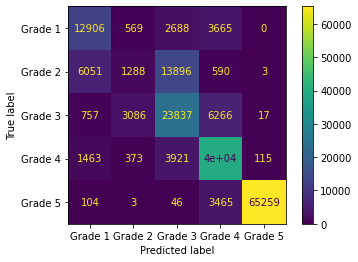

In [ ]:
class_names =['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model5, X_test_top_5, y_test, display_labels=class_names);

Decision Tree

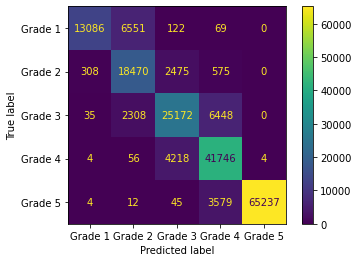

In [ ]:
class_names =['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf5, X_test_top_5, y_test, display_labels=class_names);

Random Forest

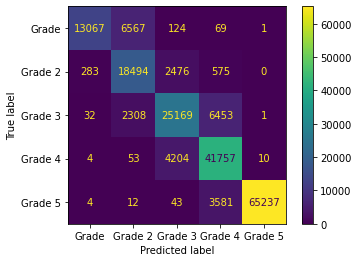

In [ ]:
class_names =['Grade', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(forest5, X_test_top_5, y_test, display_labels=class_names);

## Considering all are ordinal and all features

In [ ]:
y_predict_ao = model.predict(X_test)
from sklearn.metrics import classification_report
cr_lr_ao = classification_report(y_test,y_predict_ao)
print(cr_lr_ao)

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     19828
           1       0.46      0.16      0.23     21828
           2       0.55      0.73      0.63     33963
           3       0.77      0.85      0.81     46028
           4       0.98      0.95      0.96     68877

    accuracy                           0.77    190524
   macro avg       0.69      0.68      0.67    190524
weighted avg       0.76      0.77      0.76    190524



In [ ]:
y_predict_dt_ao = clf.predict(X_test)
cr_dt_ao = classification_report(y_test,y_predict_dt_ao)
print(cr_dt_ao)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     19828
           1       0.71      0.72      0.72     21828
           2       0.65      0.66      0.65     33963
           3       0.77      0.76      0.76     46028
           4       0.96      0.96      0.96     68877

    accuracy                           0.82    190524
   macro avg       0.80      0.80      0.80    190524
weighted avg       0.82      0.82      0.82    190524



In [ ]:
y_predict_rf_ao = forest.predict(X_test)
cr_rf_ao = classification_report(y_test,y_predict_rf_ao)
print(cr_rf_ao)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     19828
           1       0.80      0.82      0.81     21828
           2       0.77      0.75      0.76     33963
           3       0.81      0.88      0.84     46028
           4       0.99      0.95      0.97     68877

    accuracy                           0.88    190524
   macro avg       0.86      0.86      0.86    190524
weighted avg       0.88      0.88      0.88    190524



## Model Optimization

## Deployment 
- Backend: Django API 
- Frontend: React or Vanilla
- Cloud: Azure/Aws
